**Task:-** 

EF-2: Try to make generative model of jet images, using a AUC of a discriminator to distinguish Generative model data / real data as metric

From https://github.com/makagan/SSI_Projects/blob/main/jet_notebooks/1.LHCJetDatasetExploration.ipynbfrom 

In [1]:
## Reading the files
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
 # Data already downloaded 
# let's open the file
fileIN = '../jet_notebooks/Data-MLtutorial/JetDataset/jetImage_7_100p_30000_40000.h5'
f = h5py.File(fileIN)
# and see what it contains
print(list(f.keys()))

['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']


In [3]:
# These are the quantities we are dealing with
featurenames = f.get('jetFeatureNames')
print(featurenames[:])
# the b is due to the byte vs utf-8 encoding of the strings in the dataset
# just ignore them for the moment

[b'j_ptfrac' b'j_pt' b'j_eta' b'j_mass' b'j_tau1_b1' b'j_tau2_b1'
 b'j_tau3_b1' b'j_tau1_b2' b'j_tau2_b2' b'j_tau3_b2' b'j_tau32_b1'
 b'j_tau32_b2' b'j_zlogz' b'j_c1_b0' b'j_c1_b1' b'j_c1_b2' b'j_c2_b1'
 b'j_c2_b2' b'j_d2_b1' b'j_d2_b2' b'j_d2_a1_b1' b'j_d2_a1_b2' b'j_m2_b1'
 b'j_m2_b2' b'j_n2_b1' b'j_n2_b2' b'j_tau1_b1_mmdt' b'j_tau2_b1_mmdt'
 b'j_tau3_b1_mmdt' b'j_tau1_b2_mmdt' b'j_tau2_b2_mmdt' b'j_tau3_b2_mmdt'
 b'j_tau32_b1_mmdt' b'j_tau32_b2_mmdt' b'j_c1_b0_mmdt' b'j_c1_b1_mmdt'
 b'j_c1_b2_mmdt' b'j_c2_b1_mmdt' b'j_c2_b2_mmdt' b'j_d2_b1_mmdt'
 b'j_d2_b2_mmdt' b'j_d2_a1_b1_mmdt' b'j_d2_a1_b2_mmdt' b'j_m2_b1_mmdt'
 b'j_m2_b2_mmdt' b'j_n2_b1_mmdt' b'j_n2_b2_mmdt' b'j_mass_trim'
 b'j_mass_mmdt' b'j_mass_prun' b'j_mass_sdb2' b'j_mass_sdm1'
 b'j_multiplicity' b'j_g' b'j_q' b'j_w' b'j_z' b'j_t' b'j_undef']


In [4]:
print(f.get('jetImage'))

<HDF5 dataset "jetImage": shape (10000, 100, 100), type "<f8">


In [5]:
jet_data = np.array(f.get('jets'))
target = jet_data[:,-6:-1]
# shape of the dataset
print("Dataset shape:")
print(target.shape)
print("First five entries:")
for i in range(5):
    print(target[i])
print("Last 5 entries:")
for i in range(-5,0):
    print(target[i])

Dataset shape:
(10000, 5)
First five entries:
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0.]
Last 5 entries:
[0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0.]


In [6]:
data = np.array(jet_data[:,:-6])
print(data.shape)

(10000, 53)


In [7]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
# this function makes the histogram of a given quantity for the five classes
def makePlot(feature_index, input_data, input_featurenames):
    plt.subplots()
    for i in range(len(labelCat)):
        # notice the use of numpy masking to select specific classes of jets
        my_data = input_data[np.argmax(target, axis=1) == i]
        # then plot the right quantity for the reduced array
        plt.hist(my_data[:,feature_index], 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.yscale('log')    
    plt.legend(labelCat, fontsize=12, frameon=False)
    plt.xlabel(str(input_featurenames[feature_index], "utf-8"), fontsize=15)
    plt.ylabel('Prob. Density (a.u.)', fontsize=15)
    plt.show()
    #del fig, ax
    #return fig, ax

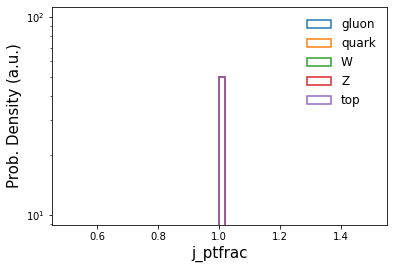

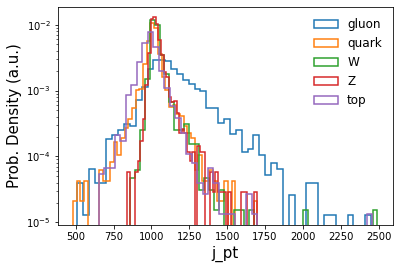

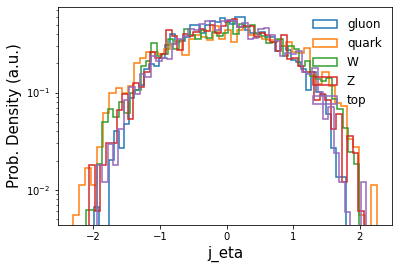

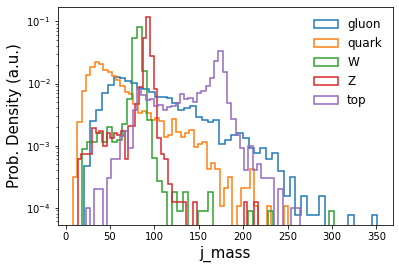

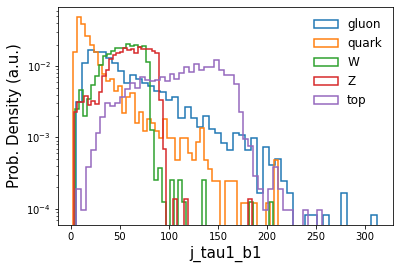

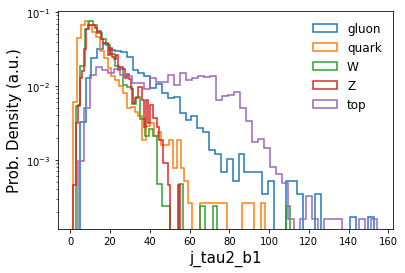

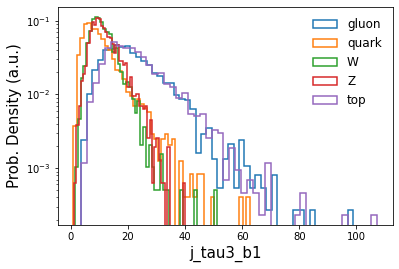

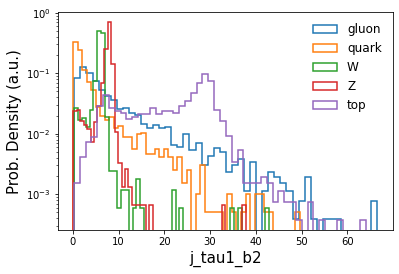

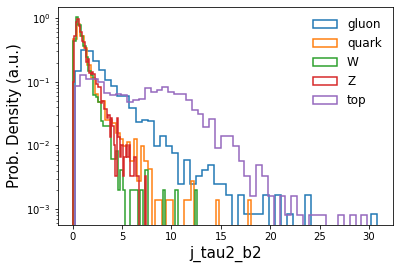

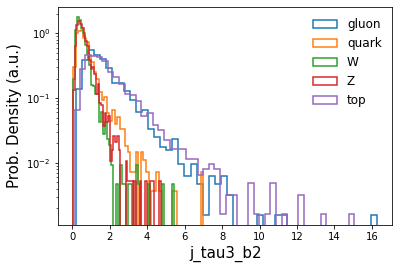

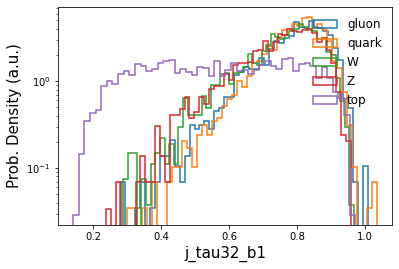

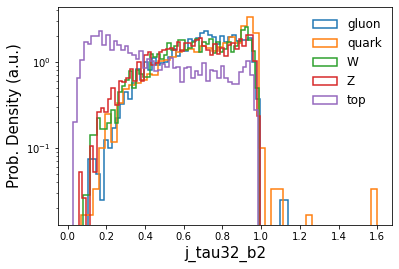

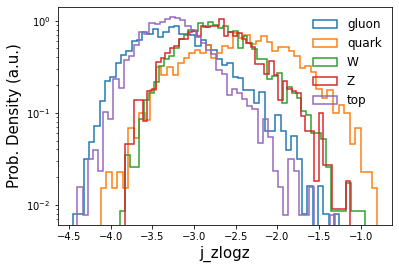

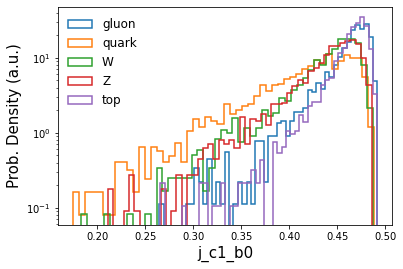

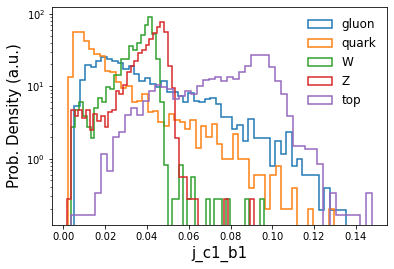

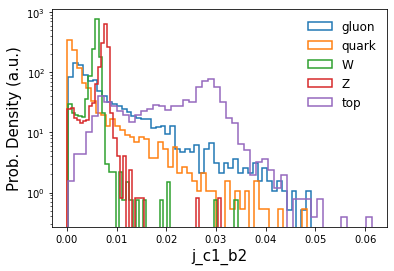

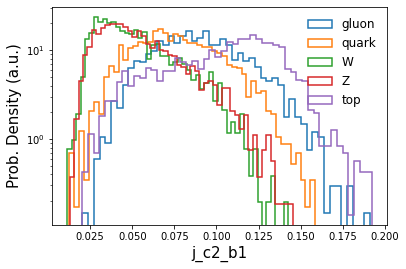

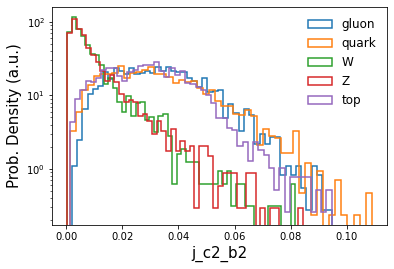

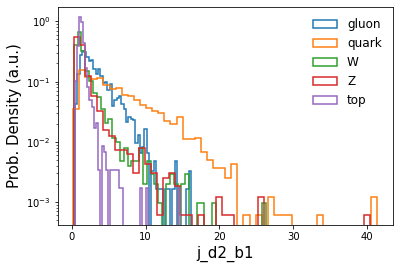

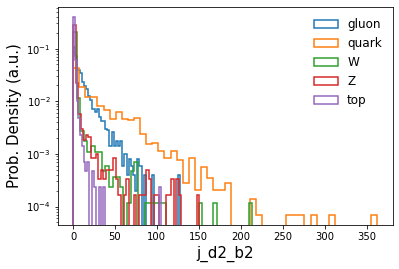

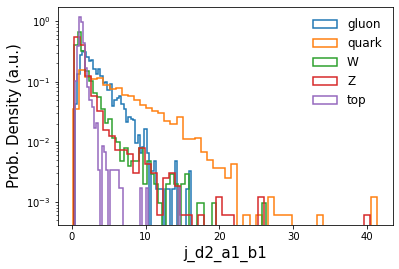

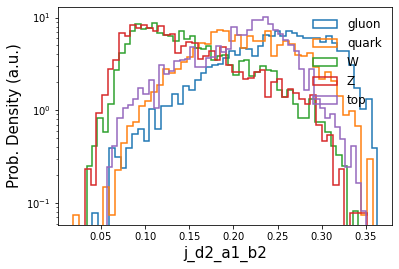

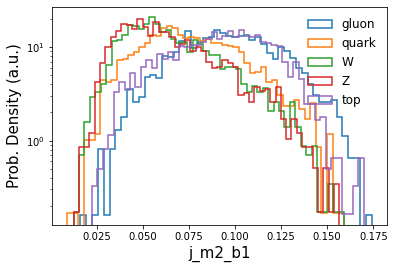

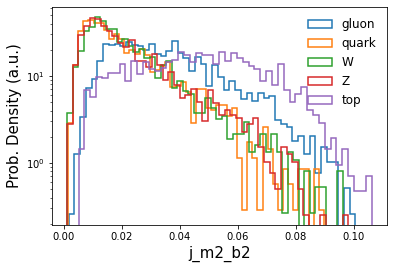

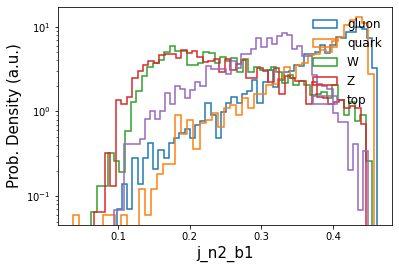

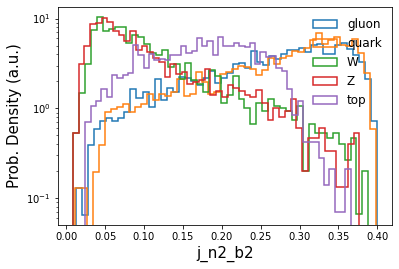

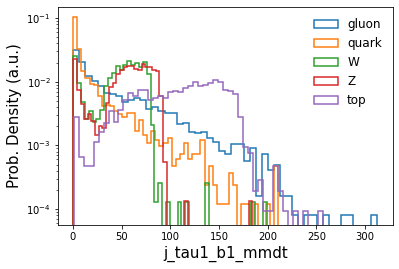

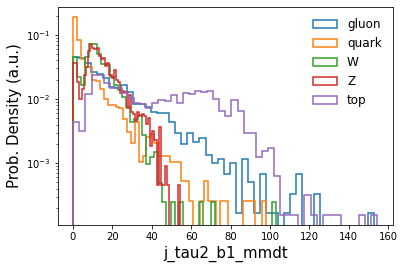

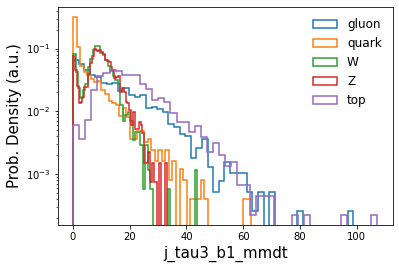

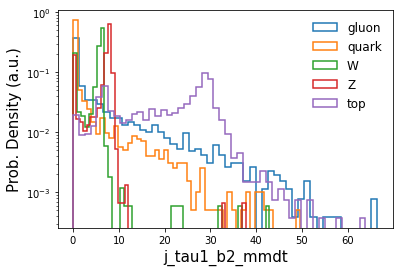

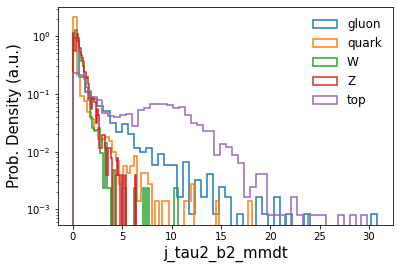

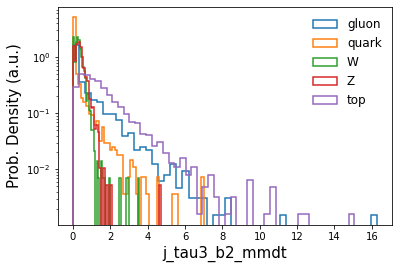

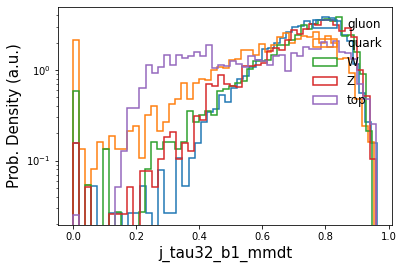

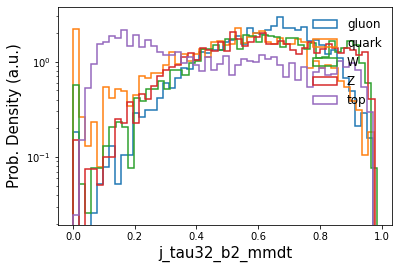

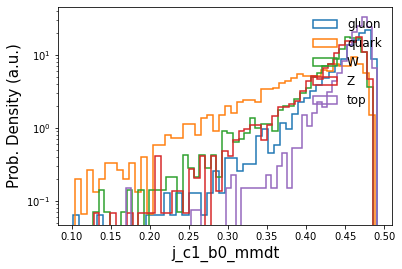

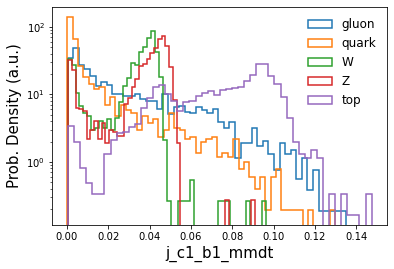

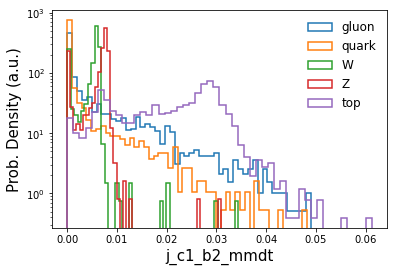

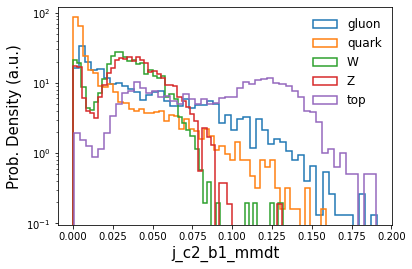

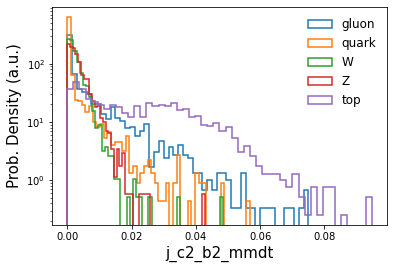

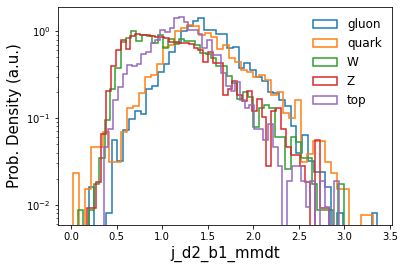

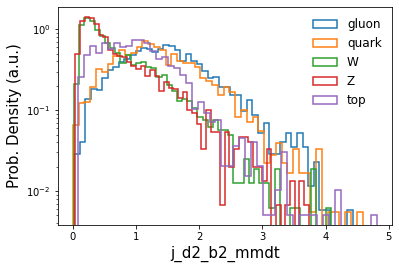

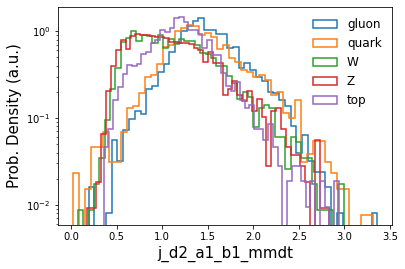

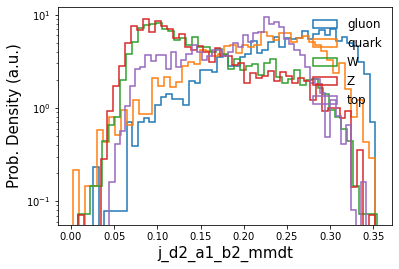

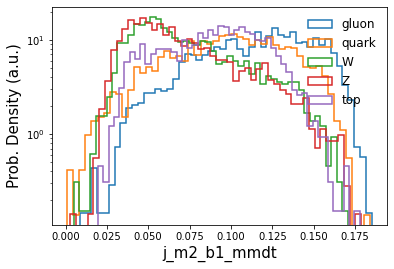

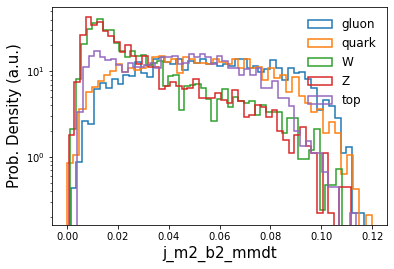

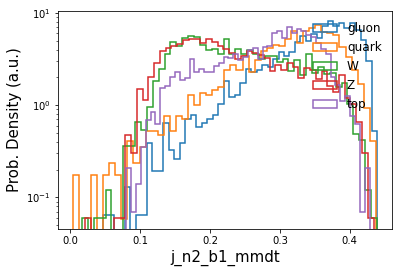

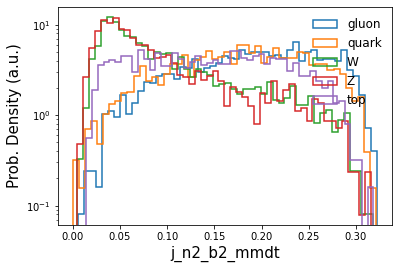

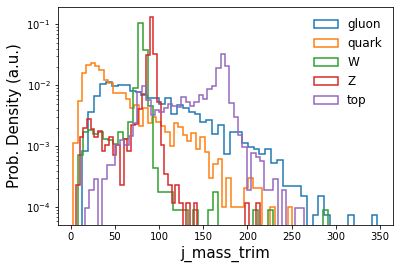

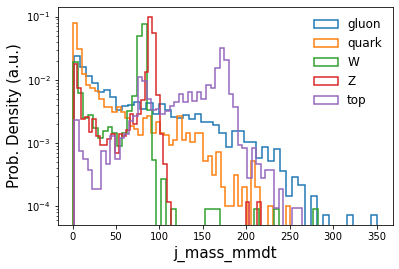

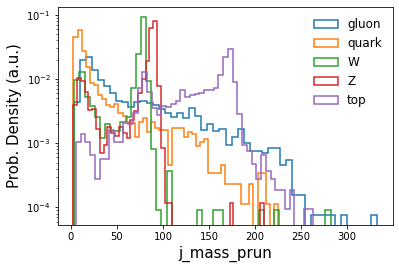

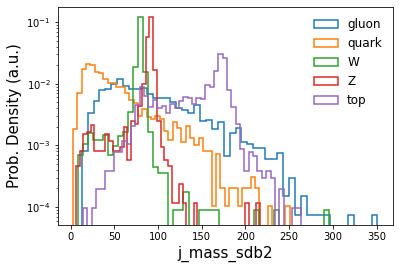

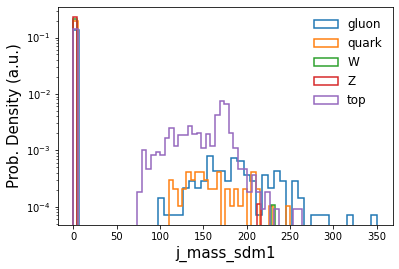

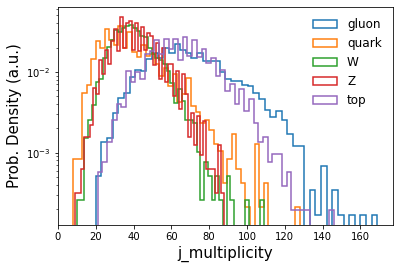

In [8]:
# we now plot all the features
for i in range(len(featurenames[:-6])):
    makePlot(i, data, featurenames)
    #fig.show()

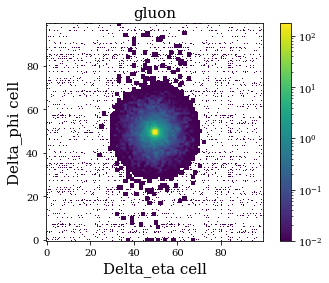

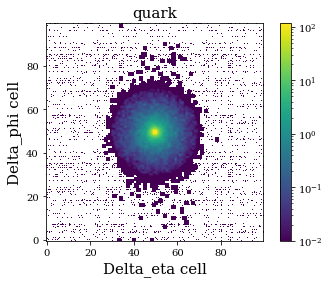

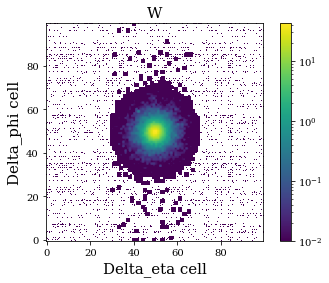

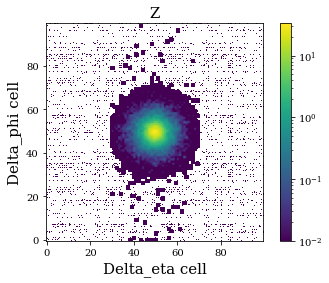

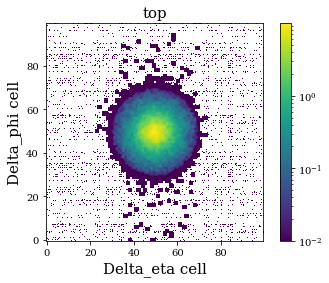

In [9]:
from matplotlib.colors import LogNorm
labelCat= ["gluon", "quark", "W", "Z", "top"]
image = np.array(f.get('jetImage'))
image_g = image[np.argmax(target, axis=1) == 0]
image_q = image[np.argmax(target, axis=1) == 1]
image_W = image[np.argmax(target, axis=1) == 2]
image_Z = image[np.argmax(target, axis=1) == 3]
image_t = image[np.argmax(target, axis=1) == 4]
images = [image_q, image_g, image_W, image_Z, image_t]
#plt.rc('text', usetex=True) #you can uncomment this if you have a latex installation
plt.rc('font', family='serif')
for i in range(len(images)):
    SUM_Image = np.sum(images[i], axis = 0)
    plt.imshow(SUM_Image/float(images[i].shape[0]), origin='lower',norm=LogNorm(vmin=0.01))
    plt.colorbar()
    plt.title(labelCat[i], fontsize=15)
    plt.xlabel("Delta_eta cell", fontsize=15)
    plt.ylabel("Delta_phi cell", fontsize=15)
    plt.show()

# The particle-list dataset
In this case, we look at the particle-related features that we have stored for each jet constituent. The structure of the dataset is similar to that of the physics-motivated features, except for the fact that we have now a double-index dataset: (jet index, particle index). The list is cut at 100 constituents /jet. If less are found, the dataset is completed filling it with 0s (zero padding)

In [10]:
p_featurenames = f.get("particleFeatureNames")
print(p_featurenames[:])

[b'j1_px' b'j1_py' b'j1_pz' b'j1_e' b'j1_erel' b'j1_pt' b'j1_ptrel'
 b'j1_eta' b'j1_etarel' b'j1_etarot' b'j1_phi' b'j1_phirel' b'j1_phirot'
 b'j1_deltaR' b'j1_costheta' b'j1_costhetarel' b'j1_pdgid']


In [11]:
p_data = f.get("jetConstituentList")
print(p_data.shape)

(10000, 100, 16)


In [12]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
# this function makes the histogram of a given quantity for the five classes
def makePlot_p(feature_index, input_data, input_featurenames):
    plt.subplots()
    for i in range(len(labelCat)):
        my_data = input_data[:,:,feature_index]
        # notice the use of numpy masking to select specific classes of jets
        my_data = my_data[np.argmax(target, axis=1) == i]
        # then plot the right quantity for the reduced array
        plt.hist(my_data[:,feature_index].flatten(), 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.yscale('log')    
    plt.legend(labelCat, fontsize=12, frameon=False)  
    plt.xlabel(str(input_featurenames[feature_index], "utf-8"), fontsize=15)
    plt.ylabel('Prob. Density (a.u.)', fontsize=15)
    plt.show()
    #del fig, ax
    #return fig, ax

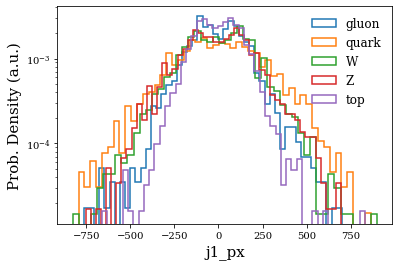

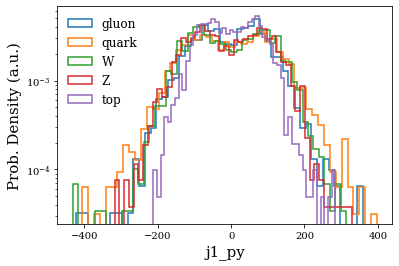

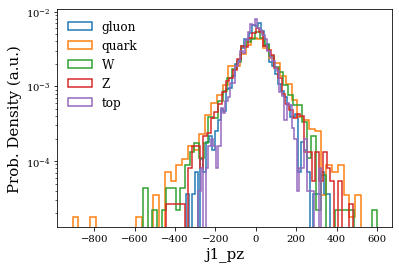

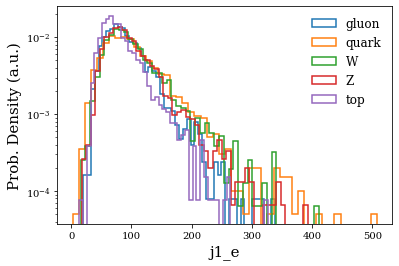

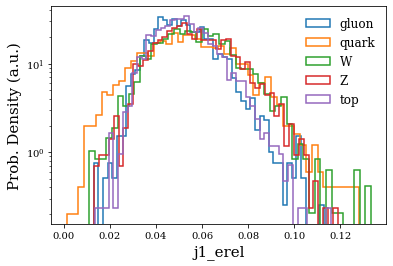

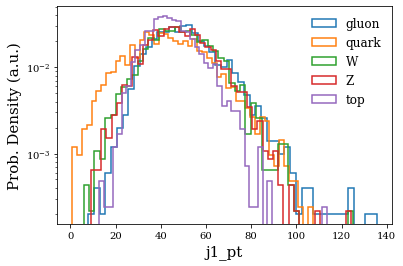

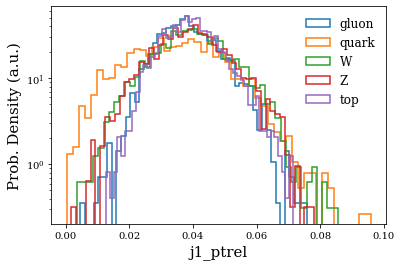

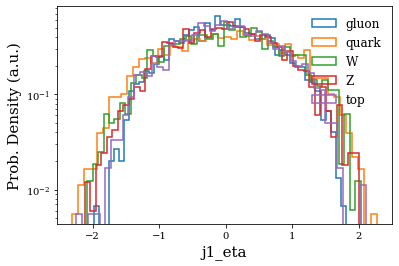

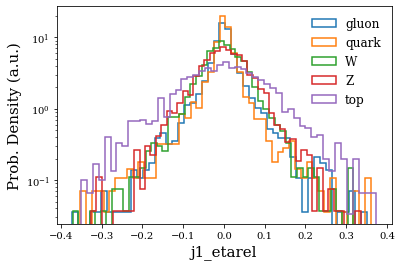

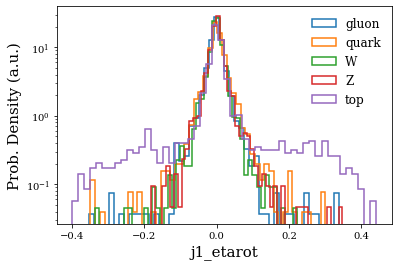

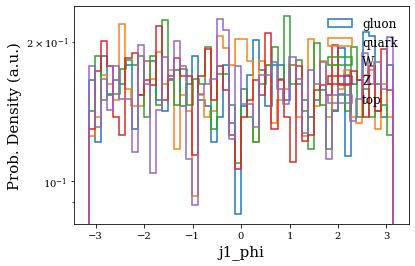

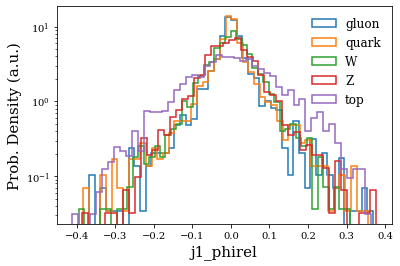

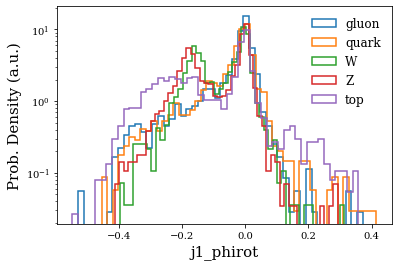

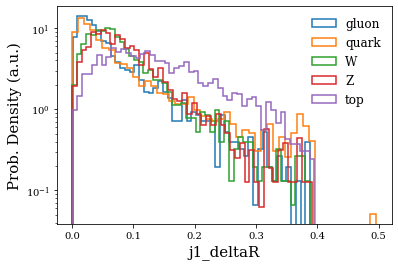

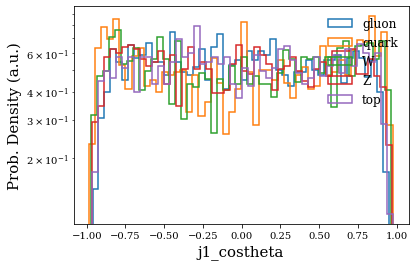

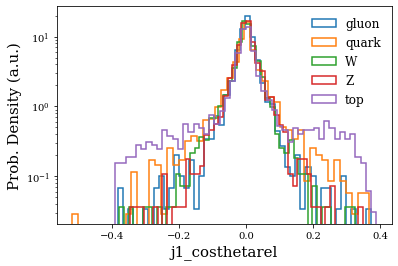

In [13]:
# we now plot all the features
for i in range(len(p_featurenames)-1):
    makePlot_p(i, p_data, p_featurenames)
    #fig.show()

## Generative model of jet images with AE

In [14]:
import keras
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Importing keras and related modules
import tensorflow as tf
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Lambda
from tensorflow.keras.losses import mse
from tensorflow.keras.callbacks import EarlyStopping


# Data Preprocessing


In [15]:
# Prepare the data
# Assuming you have jet images in a numpy array 'jet_images'
# Normalize the pixel values between 0 and 1
jet_images = np.array(f.get('jetImage')).astype('float32') / 255.0


In [16]:
# Get the shape of the first image in the dataset
first_image_shape = jet_images[0].shape

# Print the dimensions of the first image
print("Dimensions of the first image:", first_image_shape)

Dimensions of the first image: (100, 100)


In [17]:
dataset_shape = jet_images.shape
# Print the shape of the dataset
print("Shape of the dataset:", dataset_shape)
image_size = dataset_shape[1]
print(f'image_size is,',image_size)

Shape of the dataset: (10000, 100, 100)
image_size is, 100


In [18]:
# Split the data into training and validation sets
train_size = int(0.8 * len(jet_images))
x_train = jet_images[:train_size]
x_val = jet_images[train_size:]


In [19]:
# Add the batch dimension to your training and validation data
x_train = np.expand_dims(x_train, axis=-1)  # Add a single channel dimension
x_val = np.expand_dims(x_val, axis=-1)

# Model

In [20]:
# VAE architecture
latent_dim = 2  # Dimension of latent space

def build_vae(input_shape):
    # Encoder
    encoder_input = Input(shape=input_shape)
    x = Conv2D(1, (3, 3), activation='relu', padding='same')(encoder_input)
    x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)  # Add BatchNormalization here
    x = Flatten()(x)
    z_mean = Dense(latent_dim)(x)
    z_log_var = Dense(latent_dim)(x)
    
    # Reparameterization trick
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
    z = Lambda(sampling)([z_mean, z_log_var])
    
    encoder = Model(encoder_input, [z_mean, z_log_var, z], name='encoder')
    
    # Decoder
    latent_input = Input(shape=(latent_dim,))
    x = Dense(image_size * image_size  * 1, activation='relu')(latent_input)
    x = Reshape((image_size, image_size, 1))(x)
    x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
    x = Conv2DTranspose(2, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)  # Add BatchNormalization here
    decoder_output = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    decoder = Model(latent_input, decoder_output, name='decoder')
    
    # VAE model
    _, _, encoded = encoder(encoder_input)
    vae_output = decoder(encoded)
    
    vae = Model(encoder_input, vae_output, name='vae')
    
    # VAE loss
    reconstruction_loss = mse(tf.reshape(encoder_input, [-1, image_size * image_size]), tf.reshape(vae_output, [-1, image_size * image_size]))
    kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
    kl_loss = tf.reduce_sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    
    vae.add_loss(vae_loss)
    
    return vae, encoder, decoder



In [21]:
# Reshape the jet images dataset to match the model's input shape
jet_images_reshaped = jet_images.reshape((-1, image_size, image_size, 1))

# Split the dataset into training and validation sets
split_ratio = 0.8
split_idx = int(split_ratio * jet_images_reshaped.shape[0])
x_train = jet_images_reshaped[:split_idx]
x_val = jet_images_reshaped[split_idx:]

In [22]:



# Build and compile the VAE
input_shape = jet_images_reshaped[0].shape
vae, encoder, decoder = build_vae(input_shape)
vae.compile(optimizer='adam')

Make sure that you have properly built and compiled your VAE model before trying to access its summary.

In [23]:
# Get the summary of the VAE model
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 encoder (Functional)           [(None, 2),          320218      ['input_1[0][0]']                
                                 (None, 2),                                                       
                                 (None, 2)]                                                       
                                                                                                  
 decoder (Functional)           (None, 100, 100, 1)  30253       ['encoder[0][2]']              

In [24]:
# # Training loop
# epochs = 50
# batch_size = 64  # Set the batch size based on dataset size

# for epoch in range(epochs):
#     for _ in range(jet_images_reshaped.shape[0] // batch_size):
#         batch_indices = np.random.randint(0, jet_images_reshaped.shape[0], batch_size)
#         batch = jet_images_reshaped[batch_indices]
#         vae.train_on_batch(batch, batch)
    
#     print(f"Epoch {epoch}/{epochs}, Loss: {vae.evaluate(jet_images_reshaped, jet_images_reshaped, verbose=0)}")

# # Generate and save example images from the decoder
# num_examples = 10
# latent_samples = np.random.normal(size=(num_examples, latent_dim))
# generated_images = decoder.predict(latent_samples)

# # Display or save generated images

In [25]:



# Training loop
epochs = 100
batch_size = 32  # Set the batch size based on dataset size


history = vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, x_val), )


# # Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# history = vae.fit(jet_images_reshaped, jet_images_reshaped,
#                   epochs=epochs,
#                   batch_size=batch_size,
#                   validation_split=0.1,  # Using 10% of data for validation
#                   callbacks=[early_stopping])

Epoch 1/100
250/250 [==============================] - 8s 15ms/step - loss: 0.1107 - val_loss: 0.0021
Epoch 2/100
250/250 [==============================] - 3s 12ms/step - loss: 0.0084 - val_loss: 0.0021
Epoch 3/100
250/250 [==============================] - 3s 12ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 4/100
250/250 [==============================] - 3s 12ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/100
250/250 [==============================] - 3s 12ms/step - loss: 9.8011e-04 - val_loss: 9.4718e-04
Epoch 6/100
250/250 [==============================] - 3s 12ms/step - loss: 7.8092e-04 - val_loss: 7.2622e-04
Epoch 7/100
250/250 [==============================] - 3s 12ms/step - loss: 6.7380e-04 - val_loss: 6.2903e-04
Epoch 8/100
250/250 [==============================] - 3s 12ms/step - loss: 6.0868e-04 - val_loss: 5.8173e-04
Epoch 9/100
250/250 [==============================] - 3s 12ms/step - loss: 5.6596e-04 - val_loss: 5.7269e-04
Epoch 10/100
250/250 [====================

250/250 [==============================] - 3s 13ms/step - loss: 4.3655e-04 - val_loss: 4.3208e-04
Epoch 76/100
250/250 [==============================] - 3s 13ms/step - loss: 4.3626e-04 - val_loss: 4.3717e-04
Epoch 77/100
250/250 [==============================] - 3s 12ms/step - loss: 4.3611e-04 - val_loss: 4.3165e-04
Epoch 78/100
250/250 [==============================] - 3s 13ms/step - loss: 4.3634e-04 - val_loss: 4.3236e-04
Epoch 79/100
250/250 [==============================] - 3s 13ms/step - loss: 4.3600e-04 - val_loss: 4.3527e-04
Epoch 80/100
250/250 [==============================] - 3s 13ms/step - loss: 4.3603e-04 - val_loss: 4.3660e-04
Epoch 81/100
250/250 [==============================] - 3s 13ms/step - loss: 4.3609e-04 - val_loss: 4.3597e-04
Epoch 82/100
250/250 [==============================] - 3s 13ms/step - loss: 4.3598e-04 - val_loss: 4.3333e-04
Epoch 83/100
250/250 [==============================] - 3s 13ms/step - loss: 4.3615e-04 - val_loss: 4.3225e-04
Epoch 84/100
2

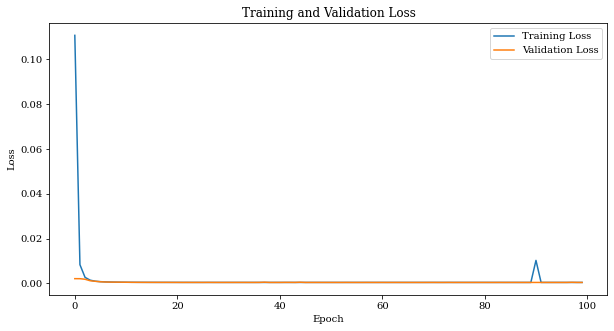

In [26]:
# Plot the training loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()



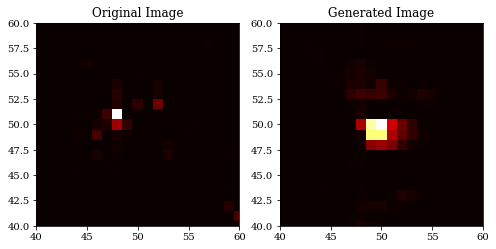

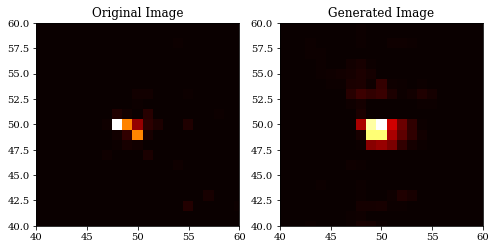

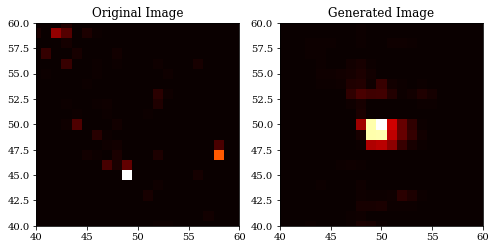

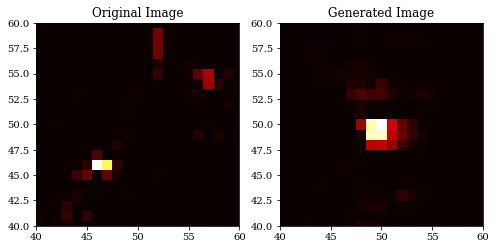

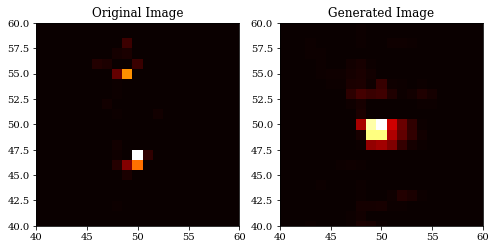

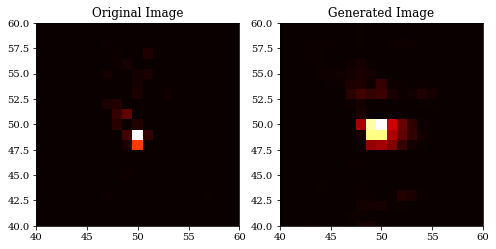

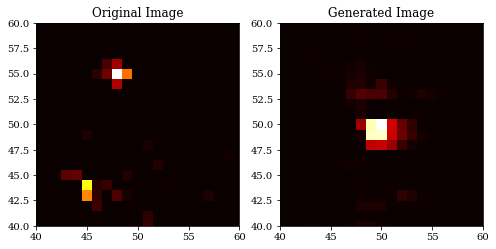

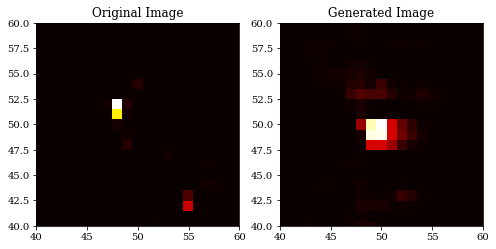

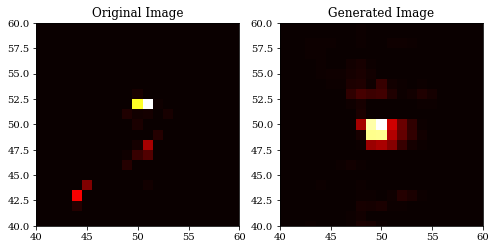

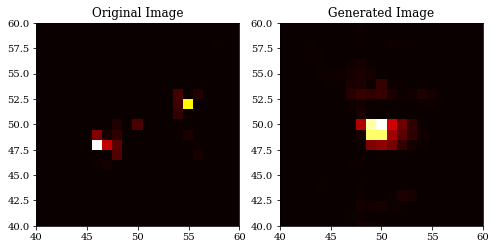

In [30]:
# Generate and save example images from the decoder
num_examples = 10
latent_samples = np.random.normal(size=(num_examples, latent_dim))
generated_images = decoder.predict(latent_samples)

# Display or save generated images
for i in range(num_examples):
    original_image = jet_images_reshaped[i].reshape(image_size, image_size)
    generated_image = generated_images[i].reshape(image_size, image_size)
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='hot')
    plt.title('Original Image')
     # Set the limits of the x and y axes for the zoomed-in view
    plt.xlim(40, 60)  # Adjust these values to focus on the region you want
    plt.ylim(40, 60)
    
    
    plt.subplot(1, 2, 2)
    plt.imshow(generated_image, cmap='hot')
    plt.title('Generated Image')
    
    # Set the limits of the x and y axes for the zoomed-in view
    plt.xlim(40, 60)  # Adjust these values to focus on the region you want
    plt.ylim(40, 60)
    
    
    plt.savefig('/eos/user/s/sraj/www/CUA/generated_image_VAE.png')
    plt.savefig('/eos/user/s/sraj/www/CUA/generated_image_VAE.pdf')
    plt.show()
    

